<a href="https://colab.research.google.com/github/BMSaumya/Inspiher/blob/main/Naive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 9.07 11.98  6.   10.03  9.5  11.96 18.71  8.36  0.   12.24 15.26  6.66
 14.07 11.23 14.33  9.81  7.87 11.26 15.1   0.3  14.16 15.28 15.15  5.68
  0.   19.02 10.98 10.23 17.09 10.81  7.86  9.02 15.43 11.98  7.82  5.43
  0.   15.01 12.16  8.41  5.72 10.18 14.31  9.81 15.49 10.46 11.1  14.02
 12.3  16.23 13.84 15.31 10.72  9.35  5.24 11.37 11.54  0.   15.38 17.04
 12.54  9.7  10.05  5.58  8.32 17.04  8.19 10.13  9.29 15.36  8.33 10.2
 14.31 18.98 11.45  5.32  9.93 15.16  5.2 ]
[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
Mean Squared Error: 0.6192088607594937
R-squared: 0.9698021246835246


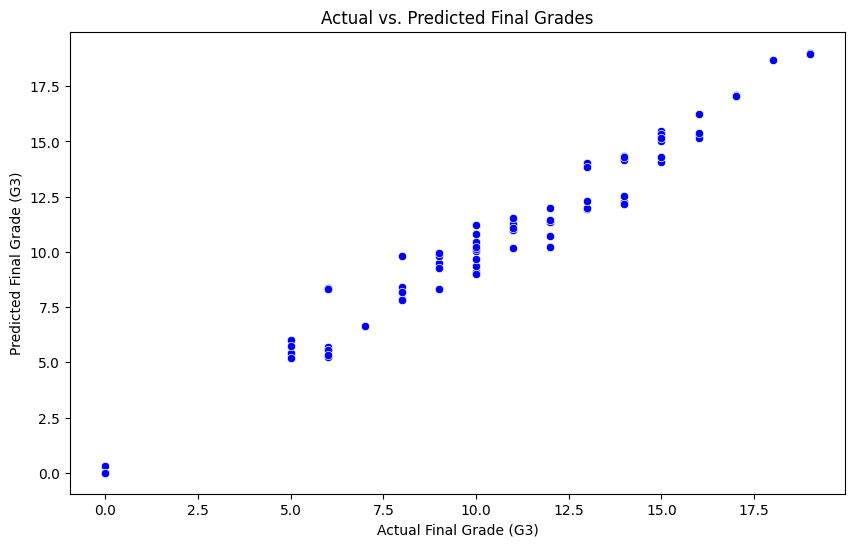

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Handle categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                        'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Calculate the mean of G1, G2, and G3 for each row
df = df.assign(mean_G=df[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = df.drop(['G1', 'G2', 'G3'], axis=1)  # Exclude G1, G2, G3 for simplicity
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)
print(y_test.values.tolist())

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade (G3)')
plt.title('Actual vs. Predicted Final Grades')
plt.show()
